## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.


In [1]:
# Your code
# Import the required library:
import pandas as pd

# Load the dataset:
data = pd.read_csv('dataset.csv', index_col = 0)
df = pd.DataFrame(data)

# Using the frac parameter to select 95% of the dataset and the random_state for the seed of sampling:
sampled_data = data.sample(frac = 0.95, random_state = 395336, axis = 0)

## Question 1 - Insights into the Data:

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled.

In [2]:
# Your code
# Import required library:
import numpy as np

# Extract values of the cancellation reason column:
vals = sampled_data[['CANCELLATION_REASON']].values

# Checking for and printing the unique values of cancellation: 
unique_vals = np.unique(vals)
print("Unique cancellation reasons:", unique_vals)

# Checking unique values of cancellation reason for cancelled and uncancelled flights:
vals = sampled_data[['CANCELLED','CANCELLATION_REASON']].values
cancelled = []
not_cancelled = []

for i in range (1, len(vals)):
    if vals[i,0] == 0:
        not_cancelled.append(vals[i,1])
    else:
        cancelled.append(vals[i,1])

        
print("Unique reasons where flight cancelled:", np.unique(cancelled), "\nUnique reasons where flight uncancelled:", np.unique(not_cancelled))

Unique cancellation reasons: ['A' 'B' 'C' 'D' 'N']
Unique reasons where flight cancelled: ['A' 'B' 'C' 'D'] 
Unique reasons where flight uncancelled: ['N']


From the analysis done so far, we can see that whenever we get the cancellation reason to be 'N', the flight has always been operational and uncancelled, where as, whenever we get any of the other reasons ['A', 'B', 'C', 'D'], the flight had been cancelled. Basically, the 'N' cancellation reason could stand for NOT CANCELLED and this difference between them would help predict if a flight would be cancelled or not (based on the cancellation reason).

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>.

In [3]:
# Your code
# Removing all the null values from sampled_data:
no_null_data = sampled_data.dropna()

# Checking for unique cancellation reasons in no_null_data:
vals = no_null_data[['CANCELLATION_REASON']].values
unique_vals = np.unique(vals)
print(unique_vals)

['N']


   In the sampled_data, we get unique values ['A', 'B', 'C', 'D', 'N'] but in the no_null_data, we get unique values to be only ['N']. This would mean that there is only null data when the flights had actually been cancelled and so all the data points in the no_null_data dataset are of flights that had not been cancelled.

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

Upper whisker for late aircraft delay: 338.0 
Upper whisker for air system delay: 65.0


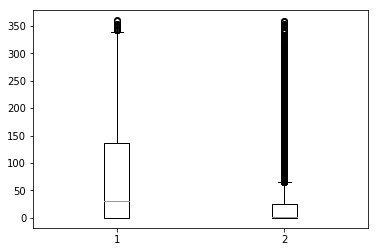

In [5]:
# Your code
# Import required library:
import matplotlib.pyplot as plt

# Creating subset of main dataset and extracting the values:
ev_data = no_null_data[(no_null_data["AIRLINE"] == "EV") & (no_null_data["ARRIVAL_DELAY"] <= 360) & (no_null_data["ARRIVAL_DELAY"] >= 120)]
data = [ev_data.LATE_AIRCRAFT_DELAY, ev_data.AIR_SYSTEM_DELAY]

# Using boxplot to check for whiskers and outliers:
bp = plt.boxplot(data)
for key in bp:
    if key == "caps":
        a = [item.get_ydata() for item in bp[key]]
x = a[1][0]
y = a[3][0]
print("Upper whisker for late aircraft delay:", x, "\nUpper whisker for air system delay:", y)

# Creating required two datasets from ev_data:
cleaned_data_late_aircraft = ev_data[(ev_data["LATE_AIRCRAFT_DELAY"] <= x)]
cleaned_data_air_system = ev_data[(ev_data["AIR_SYSTEM_DELAY"] <= y)]

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>.  

In [6]:
# Your code
import statistics as st
print("for ev_data:")
print("Mean:", np.mean(ev_data.ARRIVAL_DELAY), "\nMedian:", np.median(ev_data.ARRIVAL_DELAY), "\nMode:", st.mode(ev_data.ARRIVAL_DELAY), "\nSD:", st.stdev(ev_data.ARRIVAL_DELAY), "\nVariance:", st.variance(ev_data.ARRIVAL_DELAY), "\n")
print("for cleaned_data_late_aircraft:")
print("Mean:", np.mean(cleaned_data_late_aircraft.ARRIVAL_DELAY), "\nMedian:", np.median(cleaned_data_late_aircraft.ARRIVAL_DELAY), "\nMode:", st.mode(cleaned_data_late_aircraft.ARRIVAL_DELAY), "\nSD:", st.stdev(cleaned_data_late_aircraft.ARRIVAL_DELAY), "\nVariance:", st.variance(cleaned_data_late_aircraft.ARRIVAL_DELAY), "\n")
print("for cleaned_data_air_system:")
print("Mean:", np.mean(cleaned_data_air_system.ARRIVAL_DELAY), "\nMedian:", np.median(cleaned_data_air_system.ARRIVAL_DELAY), "\nMode:", st.mode(cleaned_data_air_system.ARRIVAL_DELAY), "\nSD:", st.stdev(cleaned_data_air_system.ARRIVAL_DELAY), "\nVariance:", st.variance(cleaned_data_air_system.ARRIVAL_DELAY))

for ev_data:
Mean: 181.5802288061015 
Median: 165.0 
Mode: 121.0 
SD: 54.96759791088175 
Variance: 3021.436820092372 

for cleaned_data_late_aircraft:
Mean: 181.28112449799198 
Median: 165.0 
Mode: 121.0 
SD: 54.55142232403758 
Variance: 2975.857677575506 

for cleaned_data_air_system:
Mean: 181.00866409085586 
Median: 164.0 
Mode: 123.0 
SD: 54.93907351294741 
Variance: 3018.3017984610397


As it can be seen from the mean, median, mode, standard deviation and variance data provided here, the values are extremely close to each other. We can interpret this as the fact that removing the outliers did not have a huge effect on these values. The outliers are small in quantity and so they do not have a huge effect on these statistical data which is why we get to see values that so close to each other.

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

<BarContainer object of 12 artists>

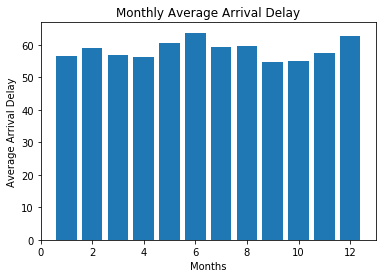

In [7]:
# Your code
x = []
y = []

# Separating the values of each month and finding the mean of the arrival delay of that month (to plot):
for i in range (1, 13):
    var = no_null_data[(no_null_data["MONTH"] == i)]
    x.append(np.mean(var.ARRIVAL_DELAY))
    y.append(i)

# Plotting the bar graph:
plt.title("Monthly Average Arrival Delay")
plt.xlabel("Months")
plt.ylabel("Average Arrival Delay")
plt.bar(y, height=x)

Based on the monthly mean plot of the arrival delay, it seems like September and October are the best months to book a ticket (low mean arrival delay) whereas June and December would be the worst (high mean arrival delay)

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>.

<BarContainer object of 12 artists>

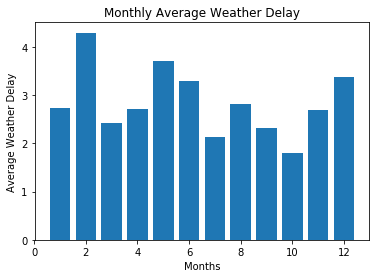

In [8]:
# Your code
x = []
y = []

# Separating the values of each month and finding the mean of the weather delay of that month (to plot):
for i in range (1, 13):
    var = no_null_data[(no_null_data["MONTH"] == i)]
    x.append(np.mean(var.WEATHER_DELAY))
    y.append(i)

# Plotting the bar graph:
plt.title("Monthly Average Weather Delay")
plt.xlabel("Months")
plt.ylabel("Average Weather Delay")
plt.bar(y, height=x)

Based on the monthly mean plot of weather delay:
- Maximum average weather delay - February
- Minimum average weather delay - October

#### c) Interpretation:

According to the monthly average arrival delay plot, September and October are the two best months to book tickets and we can see in the monthly average weather delay, October has the lowest average weather delay. Also, according to the monthly average arrival delay plot, June and December are the two worst months to book tickets and we can see in the monthly average weather delay, December and June have higher average weather delays compared to most of the other months. This could show a possible relationship between the two variables.

#### d) Mean visualization: 

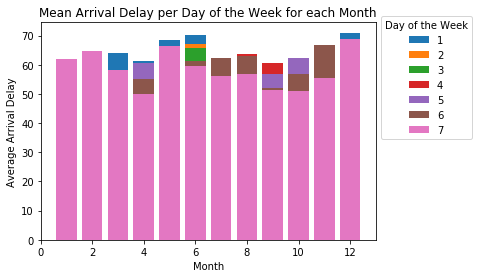

In [9]:
# Your code
x = list(range(1, 13))
y = [[] for _ in range(12)]
z = [1, 2, 3, 4, 5, 6, 7]

# Calculating and storing values for average arrival delay per day of the week per month:
for i in range (1, 13):
    for j in range(1,8):
        var = no_null_data[(no_null_data["MONTH"] == i) & (no_null_data["DAY_OF_WEEK"] == j)]
        y[i-1].append(np.mean(var.ARRIVAL_DELAY))

# Plotting the graph:
plt.title("Mean Arrival Delay per Day of the Week for each Month")
plt.xlabel("Month")
plt.ylabel("Average Arrival Delay")
for i in range(len(y[0])):
    plt.bar(x,[pt[i] for pt in y], label = z[i])
plt.legend(bbox_to_anchor=(1.0, 1.05), title='Day of the Week')
plt.show()

 Based on the plotted graph, the following combinations of Day of the Week and Month should be avoided for a decrease in the possibility of the arrival delay:
- 1st day of the week in June
- 1st day of the week in December
- 1st day of the week in May
- 6th day of the week in November
- 2nd day of the week in June

#### e) Distribution:

(array([1401.,  375.,  139.,   51.,   42.,   31.,   11.,   18.,    4.,
           5.]),
 array([ 180. ,  283.1,  386.2,  489.3,  592.4,  695.5,  798.6,  901.7,
        1004.8, 1107.9, 1211. ]),
 <a list of 10 Patch objects>)

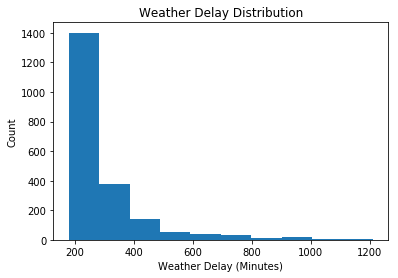

In [10]:
# Your code
# Selecting data points which have flights with at least 3 hours of weather delay:
df = no_null_data[(no_null_data["WEATHER_DELAY"] >= 180)]
vals = df[["WEATHER_DELAY"]].values

# Plotting the histogram:
plt.title("Weather Delay Distribution")
plt.xlabel("Weather Delay (Minutes)")
plt.ylabel("Count")
plt.hist(vals)

#### f) Monthly distribution:

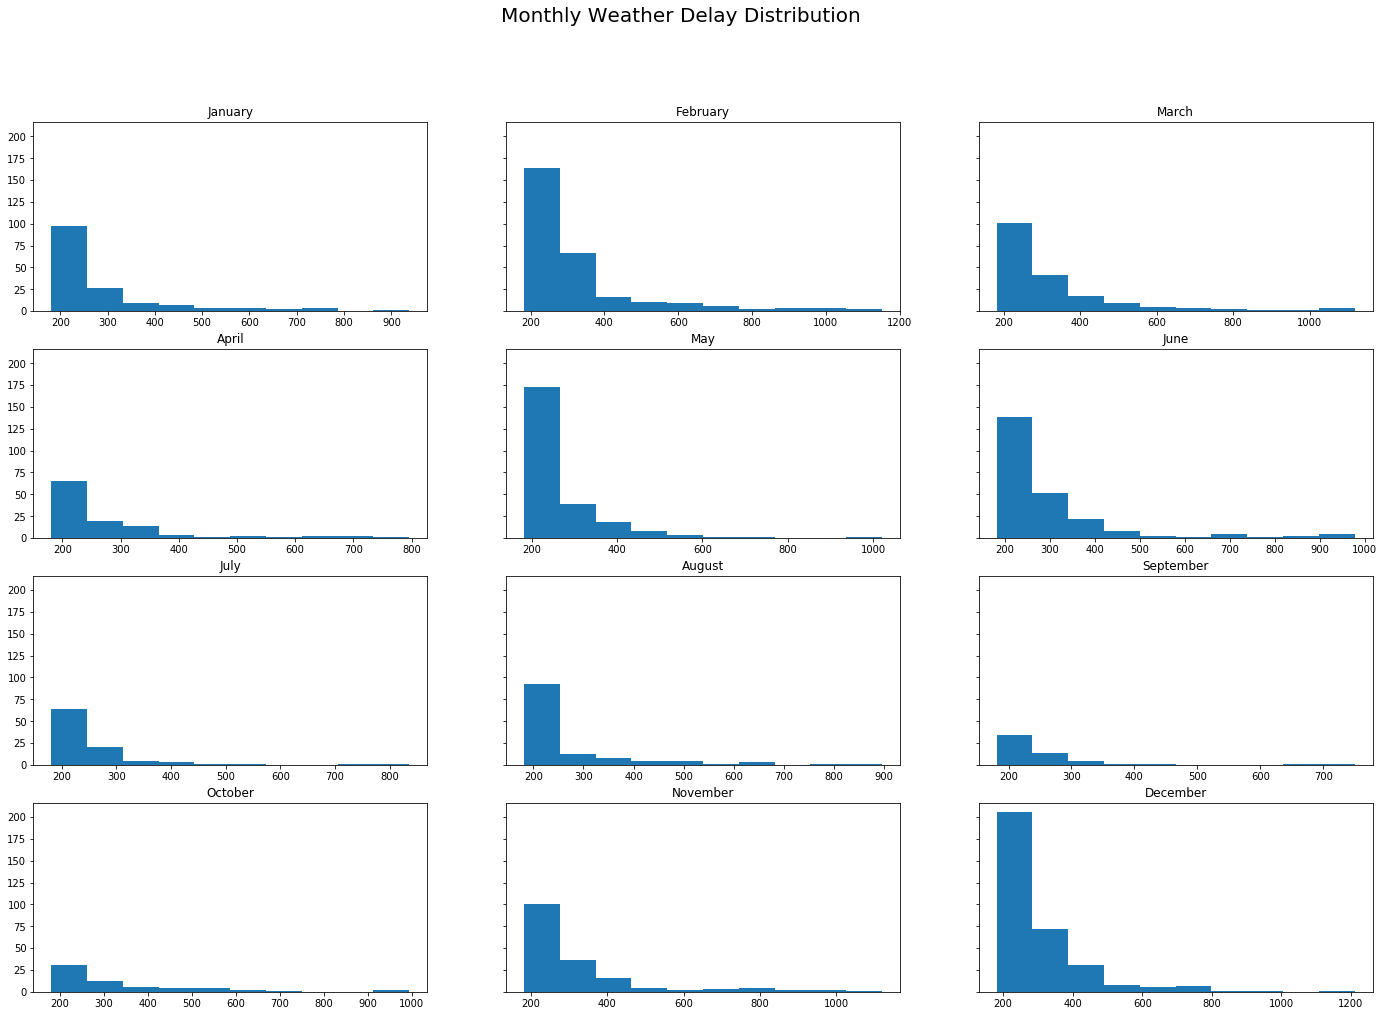

In [11]:
# Your code
y = []
z = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Extracting the values for weather delay for each month which is more than 3 hours (from no_null_data):
df = no_null_data[(no_null_data["WEATHER_DELAY"] > 180)]
for i in range (1, 13):
    df1 = df[(df["MONTH"] == i)]
    vals3 = df1[["WEATHER_DELAY"]].values
    y.append(vals3)
    
# Plotting the monthly distribution of weather delay in one figure:
fig, axs = plt.subplots(4, 3, sharey='all', figsize=(24,16))
fig.suptitle("Monthly Weather Delay Distribution",  fontsize=20)
k = 0
for i in range (0, 4):
    for j in range (0, 3):
        axs[i, j].hist(y[k])
        axs[i, j].title.set_text(z[k])
        k = k + 1

#### g) Joint distribution:

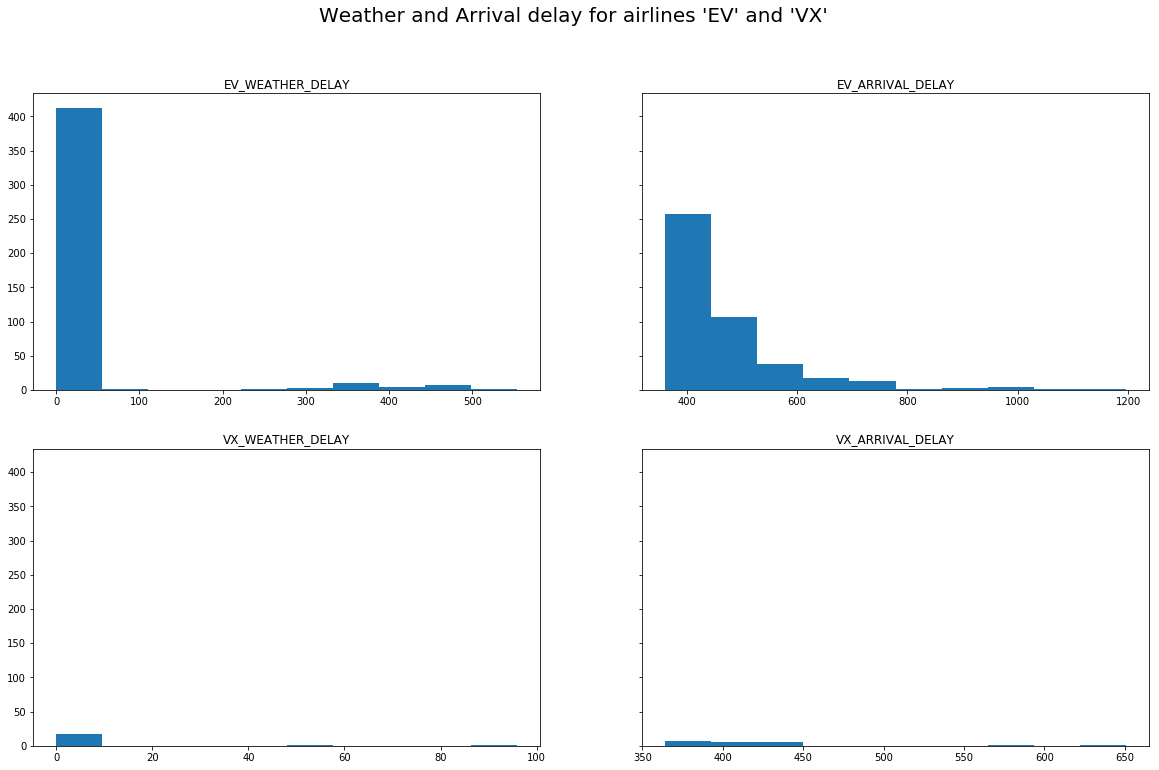

In [12]:
# Your code
x = ['EV', 'VX']
y = []
z = ['EV_WEATHER_DELAY', 'EV_ARRIVAL_DELAY', 'VX_WEATHER_DELAY', 'VX_ARRIVAL_DELAY']

# Only considering flights that have arrival delay more than 6 hours
# and only the 'EV' and 'VX' flights:
df = no_null_data[(no_null_data["ARRIVAL_DELAY"] > 360) & ((no_null_data["AIRLINE"] == 'EV') | (no_null_data["AIRLINE"] == 'VX'))]

# Storing the values for weather delay and arrival delay for flights 'EV' and 'VX':
for i in range (0,2):
    df1 = df[(df['AIRLINE'] == x[i])]
    vals = df1['WEATHER_DELAY'].values
    y.append(vals)
    vals = df1['ARRIVAL_DELAY'].values
    y.append(vals)

# Plotting the histograms:
fig, axs = plt.subplots(2, 2, sharey='all', figsize=(20,12))
fig.suptitle("Weather and Arrival delay for airlines 'EV' and 'VX'",  fontsize=20)
k = 0
for i in range (0, 2):
    for j in range (0, 2):
        axs[i, j].hist(y[k])
        axs[i, j].title.set_text(z[k])
        k = k + 1

- From the plotted histograms, it looks like the airline EV faces alot more Weather and Arrivals delays when compared to the VX airline.
- It is important to note that the number of data points where the flight VX has more than 6 hours of arrival delay is much less (only 19 data points, found using the len() function) when compared to the EV data points (more than 400 data points, again, found using the len() function) which could be the reason there is a significant difference between the plots for EV and VX airlines. 

## Question 2 - Decision Trees:

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [13]:
# Your code
# Making sure dataset contains only the flights from 'UA' airline with some non-zero arrival delay:
UA = no_null_data[(no_null_data["AIRLINE"] == "UA") & (no_null_data["ARRIVAL_DELAY"] != 0)]
UA = pd.DataFrame(UA)
DELAY = []

# Discretizing the arrival delay and adding the new categorical feature 'DELAY':
val = UA[['ARRIVAL_DELAY']].values
for i in range (0, len(val)):
    if val[i] <= 45:
        DELAY.append(1)
    else:
        DELAY.append(0)
UA['DELAY'] = DELAY

# Discretizing the distance and adding the new categorical feature 'DISTANCE_CATEGORY':
val1 = UA[['DISTANCE']].values
q = np.median(val1)
DISTANCE_CATEGORY = []
for i in range (0, len(val1)):  
    if val1[i] <= q:
        DISTANCE_CATEGORY.append(0) # 0 to denote 'short'
    else:
        DISTANCE_CATEGORY.append(1) # 1 to denote 'long'
UA['DISTANCE_CATEGORY'] = DISTANCE_CATEGORY

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

In [14]:
# Your code
# Below mentioned two lines of code were used to install the p_decision_tree library:
# import sys
# !{sys.executable} -m pip install p_decision_tree

# Importing the required module:
from p_decision_tree.DecisionTree import DecisionTree

# Descriptive features/values:
descriptive_features = ['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK']
descriptive_data = UA[descriptive_features].values

# Target features/values:
target_feature = "DELAY"
target_data = UA[target_feature].values

# Decision Tree:
decisionTree = DecisionTree(descriptive_data, descriptive_features, target_data, "entropy")

# Specifying the minimum number of samples for splitting:
decisionTree.id3(0,1000)

# System entropy value:
print("System entropy: ", format(decisionTree.entropy))

# Visualisation (we faced some problem with visualisation that we were unfortunately not able to clear):
#visual_tree = decisionTree.print_visualTree(render=True)
#display(visual_tree)

System entropy:  0.9945555606395453


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:


## Question 3 - Classification Models and Prediction:

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [15]:
# Your code
# Loading the classification dataset:
dataset = pd.read_csv("flights_classifying.csv")

Randomly order the data points using one of the group member's students as the random state.

In [16]:
# Your code
# Randomly ordering the data points using one group member's student ID as random state:
from sklearn.utils import shuffle
dataset_shuffled = shuffle(dataset, random_state=395336)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [17]:
# Your code
# Dropping data points that contain canceled flights:
df = dataset_shuffled[(dataset_shuffled['CANCELLED'] != 1)]

# Designing and adding target feature to predict whether a flight is delayed by more than 3 hours or not:
val = df[['DEPARTURE_DELAY']].values
DELAY = []
for i in range (0, len(df)):
    if val[i] > 180:
        DELAY.append(1)
    else:
        DELAY.append(0)
df['DELAY'] = DELAY

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [18]:
'''
The three choices for descriptive features were made due to the following lines of thought:
1. Arrival delay considers a sum of the possible reasons of a flight arriving late to the airport, which would in turn also 
   lead to a delay in the departure time, which is what we want to predict (if it will be more or less than 3 hours).
2. Month could influence the departure times since some months could be more busy than others due to instances like holidays
   and busier months could then lead to delays in the flight departure.
3. The scheduled departure category, which tells us if the departure happened in the morning, afternoon or evening could be
   another deciding feature considering people would prefer one time period over the other hence making it busier than the
   others and so leading to possible delays in departure.
'''
from sklearn.preprocessing import OrdinalEncoder

# Descriptive features:
X = df[["ARRIVAL_DELAY", "MONTH", "SCHEDULED_DEPARTURE_CATEGORY"]]
# Encoding the 'SCHEDULED_DEPARTURE_CATEGORY' column from 'Morning', 'Afternoon' and 'Evening' categories to numerical values:
oe = OrdinalEncoder()
X["SCHEDULED_DEPARTURE_CATEGORY"] = oe.fit_transform(X[["SCHEDULED_DEPARTURE_CATEGORY"]])
X = X.values

#Target feature values:
y = df["DELAY"].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Split your data into training and testing data, with 85% of the dataset going to testing data.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85)

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [20]:
print("The target variable that is being used:\n", df[['DELAY']])

The target variable that is being used:
         DELAY
393758      0
343038      0
89792       0
371000      0
565771      1
90324       0
78155       0
565362      1
480478      0
441468      0
22733       0
412532      0
345678      0
140451      0
460855      0
471633      0
181679      0
9335        0
368095      0
500683      0
415441      0
390879      0
38933       0
196559      0
579047      1
470090      0
212490      0
34790       0
525203      0
376061      0
...       ...
520885      0
422619      0
177509      0
385381      0
440959      0
4582        0
265736      0
386566      0
80688       0
470020      0
554861      0
190864      0
46399       0
154198      0
120552      0
497142      0
34329       0
61684       0
575930      1
277467      0
92125       0
164720      0
151408      0
179767      0
215937      0
289107      0
424291      0
177976      0
66432       0
279255      0

[525584 rows x 1 columns]


- As we can see from the output printed above, the delay is either 0, meaning the delay was less than three hours, or 1, meaning the delay was more than three hours. This is what we are trying to predict as our target variable.
- Keeping this in mind, a good evaluation metric would be the model accuracy. This basically means that when the model prdicts the outputs for the test set (X_test), it compares these predictions to the known outputs (y_test) and checks how accurately it predicted these outputs. This is given by dividing the number of correct predictions by the total number of predictions.

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [21]:
# Your code
count = 0
vals = df['DELAY'].values
for i in range (0, len(vals)):
    if vals[i] == 1:
        count = count + 1

acc_rand = (count/len(vals))*100
print("Number of flights delayed more than three hours in the dataset:", count)
print("Probability of flight chosen at random from the dataset would be delayed by more than three hours: %.2f" % acc_rand, "%")

Number of flights delayed more than three hours in the dataset: 36385
Probability of flight chosen at random from the dataset would be delayed by more than three hours: 6.92 %


- As it can be seen from the code above, if we were to choose a random flight from the dataset provided, there would only be approximately a 7% chance that our flight would end up delayed for more than 3 hous and this is not idea for our scenario here.

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [23]:
# Your code
# Using Logistic Regression to solve a classification problem (flight will have more than 3 hours of delay or not):
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Training the model using the X and y training sets:
model.fit(X_train, y_train)

# Finding the accuracy of the model by testing with the test set:
acc_reg = model.score(X_test, y_test)*100
print("Logistic Regression Model Accuracy: %.2f" % acc_reg, "%")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Model Accuracy: 98.77 %


#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [24]:
# Your code
# Sampling 10,000 points as a subset of the main dataset:
df_subset = df.sample(n=10000)

# Finding the descriptive and target values again after sampling the main dataset:
X = df_subset[["ARRIVAL_DELAY", "MONTH", "SCHEDULED_DEPARTURE_CATEGORY"]]
y = df_subset["DELAY"].values
oe = OrdinalEncoder()
X["SCHEDULED_DEPARTURE_CATEGORY"] = oe.fit_transform(X[["SCHEDULED_DEPARTURE_CATEGORY"]])
X = X.values

# Splitting data into training and testing data:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.85)

# Importing the necessary modules for the SVM model:
from sklearn import svm
from sklearn import metrics
clf = svm.SVC(kernel='linear') # Linear Kernel

# Training the model using the X and y training sets:
clf.fit(X_train_sub, y_train_sub)

# Finding the accuracy of the model by testing with the test set:
y_pred = clf.predict(X_test_sub)
acc_svm = metrics.accuracy_score(y_test_sub, y_pred)*100
print("SVM Model Accuracy: %.2f" % acc_svm, "%")

SVM Model Accuracy: 98.82 %


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [25]:
# Your code
# Importing the necessary module:
import tensorflow as tf

# Setting up the neural network including the input nodes, hidden nodes, output nodes and
# activation functions:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

# Compiling the neural network:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Training the model using the X and y training sets:
model.fit(X_train, y_train, epochs=15)

# Evaluating the model using the accuracy:
_, accuracy = model.evaluate(X_test, y_test)
acc_nn = accuracy*100
print('Neural Network Accuracy: %.2f' % (accuracy*100), "%")

Epoch 1/15
2464/2464 [==============================] - 4s 1ms/step - loss: 0.1432 - accuracy: 0.9573
Epoch 2/15
2464/2464 [==============================] - 3s 1ms/step - loss: 0.0625 - accuracy: 0.9754
Epoch 3/15
2464/2464 [==============================] - 3s 1ms/step - loss: 0.0442 - accuracy: 0.9817
Epoch 4/15
2464/2464 [==============================] - 3s 1ms/step - loss: 0.0429 - accuracy: 0.9824
Epoch 5/15
2464/2464 [==============================] - 3s 1ms/step - loss: 0.0379 - accuracy: 0.9836
Epoch 6/15
2464/2464 [==============================] - 4s 1ms/step - loss: 0.0371 - accuracy: 0.9840
Epoch 7/15
2464/2464 [==============================] - 3s 1ms/step - loss: 0.0350 - accuracy: 0.9851
Epoch 8/15
2464/2464 [==============================] - 3s 1ms/step - loss: 0.0340 - accuracy: 0.9853
Epoch 9/15
2464/2464 [==============================] - 3s 1ms/step - loss: 0.0336 - accuracy: 0.9855
Epoch 10/15
2464/2464 [==============================] - 4s 2ms/step - loss: 0.033

### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [26]:
# your code if needed
print("Chance of getting a delayed flight when choosing randomly from the dataset: %.2f" % acc_rand, "%")
print("Chance of getting a delayed flight when using the Regression Model: %.2f" % acc_reg, "%")
print("Chance of getting a delayed flight when using the SVM Model: %.2f" % acc_svm, "%")
print("Chance of getting a delayed flight when using Neural Networks: %.2f" % acc_nn, "%")

Chance of getting a delayed flight when choosing randomly from the dataset: 6.92 %
Chance of getting a delayed flight when using the Regression Model: 98.77 %
Chance of getting a delayed flight when using the SVM Model: 98.82 %
Chance of getting a delayed flight when using Neural Networks: 98.62 %


- As it can be seen from the percentage chances above, the chance of getting a delayed flight using Regression, SVM or Neural Networks is instrumentally higher than that of choosing a random flight from the dataset. Using any of these three model would give us, more or less, a sure shot way of travelling the world for free.

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [27]:
# Your code

# Removing all flights with more than 600 minutes weather delay or with more than 600 minutes late arrival delay:
wd = no_null_data[no_null_data["WEATHER_DELAY"]>600].index
ad = no_null_data[no_null_data["ARRIVAL_DELAY"]>600].index
com = (wd | ad)
no_null_data.drop(com)

# Creating clustering_dataset with the addition of the AIR_TIME_DELAY column:
no_null_data["AIR_TIME_DELAY"] = no_null_data["ELAPSED_TIME"] - no_null_data["SCHEDULED_TIME"]
clustering_dataset = no_null_data

# Printing number of rows and colums and the first 10 rows of the dataset:
print("Number of rows for clustering_dataset:", clustering_dataset.shape[0])
print("Number of columns for clustering_dataset:", clustering_dataset.shape[1])
clustering_dataset[["AIR_TIME_DELAY", "SCHEDULED_TIME", "ELAPSED_TIME"]].head((10))

Number of rows for clustering_dataset: 808216
Number of columns for clustering_dataset: 36


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,AIR_TIME_DELAY,SCHEDULED_TIME,ELAPSED_TIME
404426,-8.0,161.0,153.0
637156,-11.0,177.0,166.0
843850,3.0,92.0,95.0
879592,-5.0,99.0,94.0
365557,41.0,317.0,358.0
402068,16.0,112.0,128.0
443567,-9.0,113.0,104.0
82904,10.0,228.0,238.0
281098,18.0,275.0,293.0
490872,7.0,167.0,174.0


- When a value in the 'AIR_TIME_DELAY' column is positive, it means that the flight took that many minutes longer to travel than it was actually scheduled to, whereas, when a value in the 'AIR_TIME_DELAY' column is negative, it means that the flight was faster and hence took lesser time to travel the distance than the duration that it had scheduled.

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [28]:
# Your code
from sklearn.cluster import KMeans  
z = ['c1','c2','c3','c4','c5']

# Initialising the KMeans Clustering algorithm:
# PLEASE NOTE: The n_init parameter mentioned below is used to set the number of runs with different cluster seeds and
# this is set to 10 to satisfy the "atleast 5 times" parameter mentioned in the question.
kmeans = KMeans(n_clusters=5, n_init=10)
y = kmeans.fit_predict(clustering_dataset[['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']])
clustering_dataset['Cluster'] = y

clustering_dataset["Cluster"]=clustering_dataset["Cluster"].replace([0,1,2,3,4], z)

# Printing the cluster centers:
print("The five cluster centers:\n", kmeans.cluster_centers_)

# Finding the number of points in each cluster:
vals = clustering_dataset["Cluster"].values
x = 0
a = []
for i in range (0,5):
    for j in range (0, len(vals)):
        if vals[j] == z[i]:
            x = x + 1
    a.append(x)
    x = 0

# Printing the number of points in each cluster:
print("\nNumber of samples in clusters:\nC1 - ", a[0], "\nC2 - ", a[1], "\nC3 - ", a[2], "\nC4 - ", a[3], "\nC5 - ", a[4])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


The five cluster centers:
 [[ -3.42601164   1.22089182  74.18591001]
 [ -5.09065955   1.36545565  10.79372456]
 [ 27.25719948   1.56521799   2.51340577]
 [  9.03898136 172.1799687    8.35424669]
 [ -4.12558528   2.52065217 199.3798495 ]]

Number of samples in clusters:
C1 -  119217 
C2 -  441588 
C3 -  216472 
C4 -  7029 
C5 -  23910


The centers of each of the five clusters as well as the number of samples belonging to each of the clusters are mentioned in the above output of the code.

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

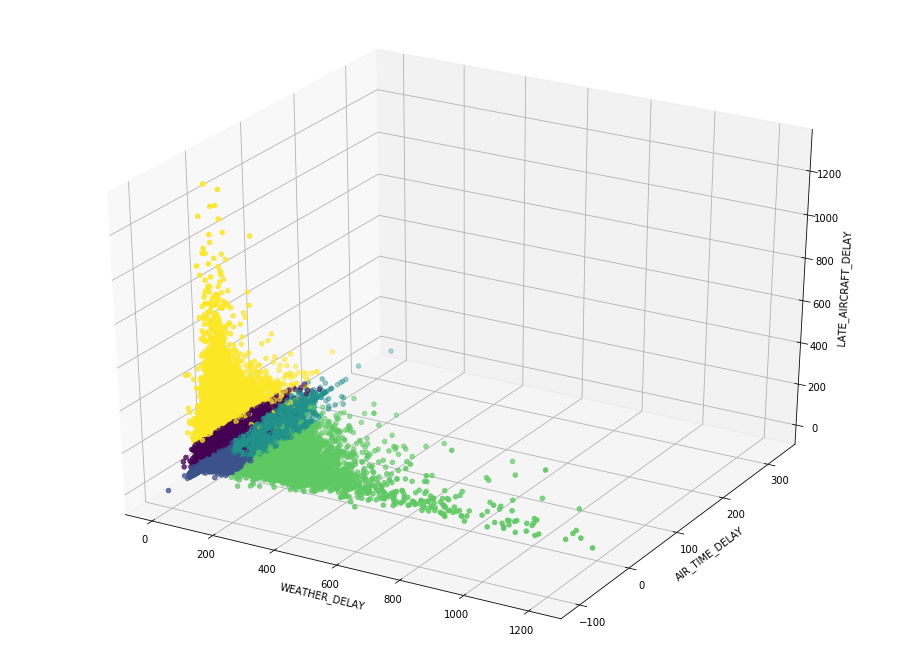

([<matplotlib.patches.Wedge at 0x2bd90a301d0>,
 [Text(1.9679785709564226, 0.9833922636752422, 'c1'),
  Text(-1.9324727350102984, 1.0514509634033429, 'c2'),
  Text(1.0331052640933809, -1.9423422750129669, 'c3'),
  Text(2.150188457843806, -0.46549929726614575, 'c4'),
  Text(2.190505202579858, -0.20417384129847838, 'c5')],
 [Text(1.0734428568853214, 0.5363957801864957, '14.75'),
  Text(-1.0540760372783444, 0.5735187073109143, '54.64'),
  Text(0.5635119622327531, -1.0594594227343455, '26.78'),
  Text(1.1728300679148032, -0.25390870759971584, '0.87'),
  Text(1.1948210195890134, -0.11136754979917, '2.96')])

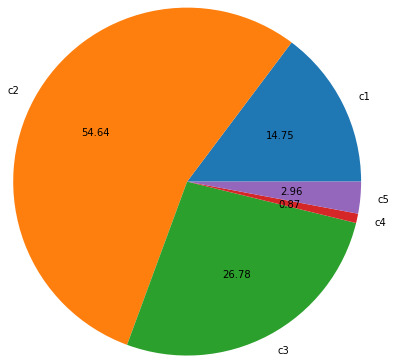

In [29]:

'''
The following lines of code mentioned here would result in an interactive 3D plot that would then make it more clear to
see the points belonging to each cluster but we were unable to run this. We belive the reason for this might be because our
system specifications are not strong enough to display this interactive graph. We mentioned it here thinking the assignment
evaluators might have a powerful enough system to run it and could maybe see the results:

import plotly.express as px
fig = px.scatter_3d(clustering_dataset["Cluster"], x = clustering_dataset['WEATHER_DELAY'], y = clustering_dataset['AIR_TIME_DELAY'], z = clustering_dataset['LATE_AIRCRAFT_DELAY'], color=clustering_dataset["Cluster"])
fig.show()
'''

# Required modules:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating the 3D plot considering  'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', and 'WEATHER_DELAY':
threedee = plt.figure(figsize=(16,12)).gca(projection='3d')
threedee.scatter(clustering_dataset['WEATHER_DELAY'], clustering_dataset['AIR_TIME_DELAY'], clustering_dataset['LATE_AIRCRAFT_DELAY'], c=y )
threedee.set_xlabel('WEATHER_DELAY')
threedee.set_ylabel('AIR_TIME_DELAY')
threedee.set_zlabel('LATE_AIRCRAFT_DELAY')
plt.show()

# Pie chart for visually comparing values in each cluster:
plt.pie(a, labels=z, autopct="%.2f", radius=2)

Form the number of samples per cluster and centroids of five clusters, one can see that the number of flights with very high 'WEATHER_DELAY' or 'LATE_AIRCRAFT_DELAY' are approximately 0.9% and 3% of the total number of flights considered here. But this factors does not affect the 'AIR_TIME_DELAY', as the pilot can compensate this by controlling the speed of the aircraft. If one examines the data closely, when the delay is caused due to the ripple effect of an earlier delay at downstream airports, the pilot seem to be able to compensate for it more easily compared to the delay caused by bad weather. This output seems logical as due to technical issues, aircraft has to maintain a safe speed in bad weather.